# bert 代码解析

## Embedding层
包含token embedding 、位置编码、段落编码、drop out

input = [Batch, Sequence_length] 

1. TokenEmbedding <br>
实质是一个词向量矩阵，每一行都是一个单词的向量表示。构建参数（矩阵大小） [vocab_size, embed_size] embed size 表示词向量大小

2. 位置编码 position embedding  <br>
循环神经网络（门控结构）和卷积神经网络（卷积）都较好的利用样本的位置信息。transform 要怎么利用样本的位置信息呢。 为了利用文本的序列信息，transform把文本序列中token的相对或者绝对的位置信息注入到token的词向量中。位置编码向量的大小和token embedding的大小一致[batch_size, embed_size]。<br>
transform使用的sine和cosine位置编码： <br>
$$PE(pos, 2i) = sin(pos/10000^{2i/d_{model}})$$
$$PE(pos, 2i) = cos(pos/10000^{2i/d_{model}})$$

3. 片段编码 segment embedding  <br>
句子级别的编码信息，表示哪些token是句子A, 哪些token是句子B。实际上是一个向量矩阵，需要学习。

4. drop out层 <br>
https://blog.csdn.net/qq_54185421/article/details/125012189


其中pos表示文本序列中token的位置，$d_{model}$表示该token的词向量维度大小， i表示词向量的i列

参考：<br>
https://zhuanlan.zhihu.com/p/454482273  <br>
https://blog.csdn.net/Brilliant_liu/article/details/135033645

## Transform块

使用的是掩码-注意力。<br>
input = [Batch, Sequence_length] $ \Rightarrow $ [Batch, 1, Sequence_length, Sequence_length] 进行token填充变换 


### 注意力

1. input 输入向量、query 权重矩阵、key权重矩阵、 value权重矩阵。inpput分别与query、key、value矩阵相乘得到输入的query、key、value。


2. 用query与每个token的query进行点积相乘，得到该token与对其他token的注意力得分。<br>


3. softmax计算所有注意力得分的分布

4. 将注意力得分分布与每个token的value相乘得到该token在其他每个token上的关注值。


5. 将该token在所有token的注意力值相加，得到该token的融合值
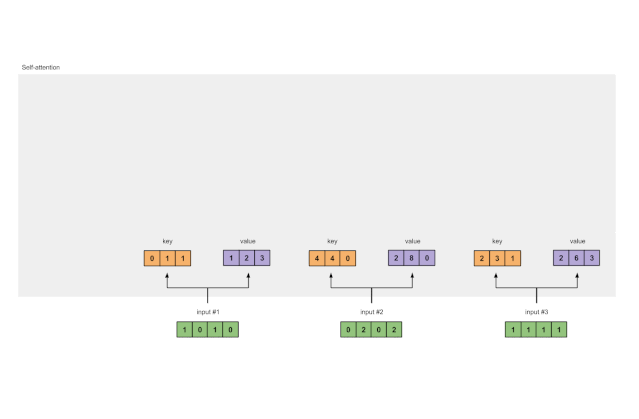
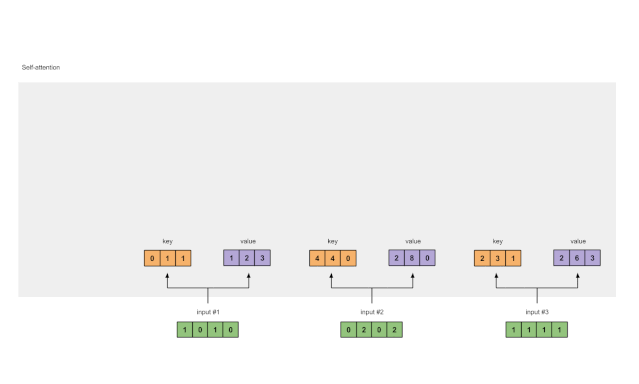
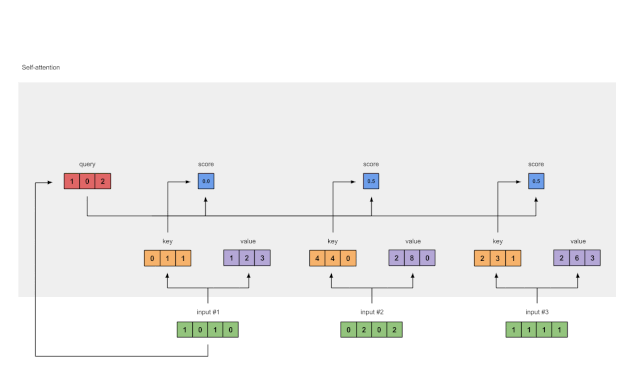
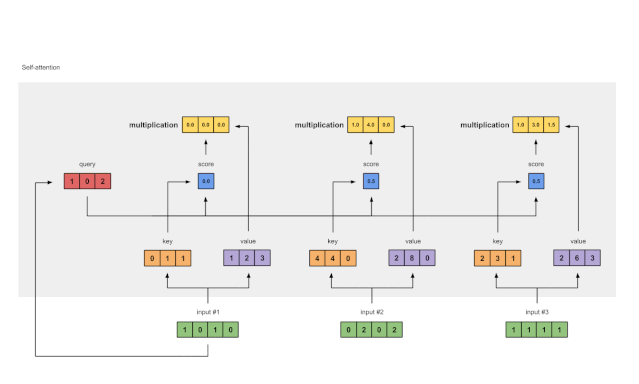
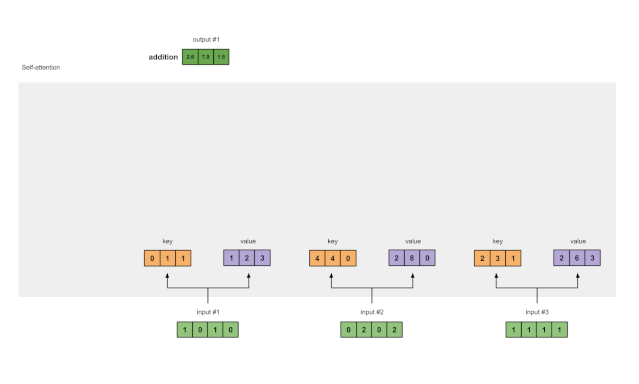

### 掩码注意力
如果想要token不对其他的某些token进行关注，则在得分矩阵上这些token的得分进行遮掩，使其为0或者极小数le-9。<br>
$$scores = scores*mask$$
